E:\Software\Python\Anaconda Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Software\Python\Anaconda Navigator\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\Software\Python\Anaconda Navigator\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
E:\Software\Python\Anaconda Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

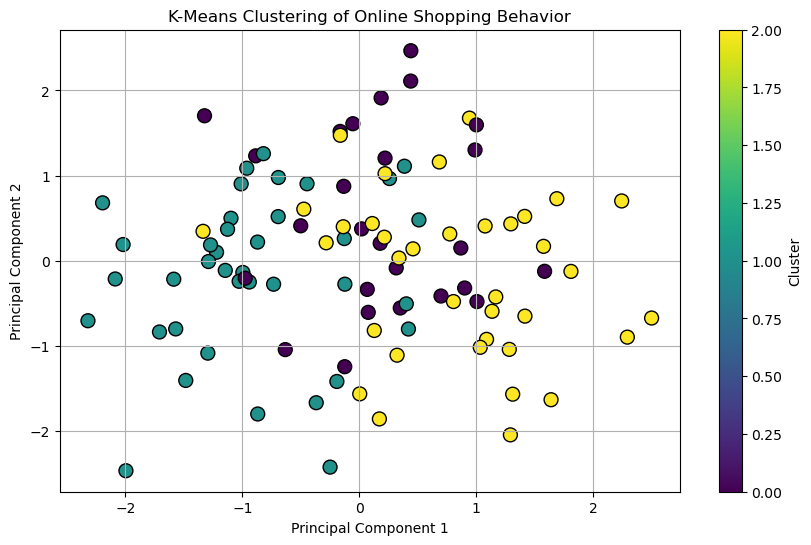

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generate a hypothetical dataset of online shopping behavior
np.random.seed(42)
# Assuming columns like 'Total Amount Spent', 'Number of Orders', 'Average Order Value', 'Days Since Last Purchase'
data = {
    'Total Amount Spent': np.random.normal(100, 30, 100),
    'Number of Orders': np.random.randint(1, 10, 100),
    'Average Order Value': np.random.normal(50, 10, 100),
    'Days Since Last Purchase': np.random.randint(1, 30, 100)
}
df = pd.DataFrame(data)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA to reduce dimensionality for visualization (optional but recommended for high-dimensional data)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

# Visualize clusters using PCA components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=100)
plt.title('K-Means Clustering of Online Shopping Behavior')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [2]:
# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster').mean().reset_index()

# Create a data frame for targeted marketing strategies
targeted_marketing_df = pd.DataFrame({
    'Cluster': cluster_means['Cluster'],
    'Total Amount Spent': cluster_means['Total Amount Spent'],
    'Number of Orders': cluster_means['Number of Orders'],
    'Average Order Value': cluster_means['Average Order Value'],
    'Days Since Last Purchase': cluster_means['Days Since Last Purchase']
})

print(targeted_marketing_df)


   Cluster  Total Amount Spent  Number of Orders  Average Order Value  \
0        0           69.578075          3.115385            51.741650   
1        1          113.246363          2.973684            52.274064   
2        2           99.335242          7.750000            50.958530   

   Days Since Last Purchase  
0                 10.884615  
1                 21.236842  
2                 11.972222  
